# Free Apps Profitability on the Apple App Store and Google Play Markets

This
short project is aimed at extracting some of the features making a free app
profitable in the main two app markets: the Apple App Store and Google Play.
Since the apps we will consider are free to download, install, and use, the only
source of revenue is advertisement. Profitability is thus strongly correlated
with the number of users: the more people use one app, the more the ads it shows
will be seen and generate money. 

There are obviously other factors to
profitability: for instance, the average time each user spends on the app and
opportnities for ad targeting should also play a role. However, for the sake of
simplicity we will focus on the number of users. Our goal is thus to understand
which features of a free app makes it attractive, and present the results in a
way to help developers design more popular apps.

## The datasets

The first
dataset we use, `AppleStore.csv`, was downloaded from [this
link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). It
contains data for 7196 Apple iOS mobile applications, extracted from the iTunes
Search API at the Apple Inc website in July 2017 by Ramanathan Perumal. The
second one, `googleplaystore.csv`, was downloaded from [this
link](https://www.kaggle.com/lava18/google-play-store-apps/home). It contains
information on 10841 apps, scrapped from scraped from the Google Play Store in
AUgust 2018 by Lavanya Gupta.

We first load these two datasets as lists of lists

In [1]:
from csv import reader
file_Apple = open('AppleStore.csv')
file_Google = open('googleplaystore.csv')
data_Apple = list(reader(file_Apple))
data_Google = list(reader(file_Google))

We then determine some of their properties. First, we find their numbers of rows
and columns.

In [2]:
n_lines_Apple = len(data_Apple)
n_columns_Apple = len(data_Apple[0])
n_lines_Google = len(data_Google)
n_columns_Google = len(data_Google[0])
print('The Apple App Store dataset has ' + str(n_lines_Apple) + ' lines and ' + str(n_columns_Apple) + ' columns.')
print('The Google Play Store dataset has ' + str(n_lines_Google) + ' lines and ' + str(n_columns_Google) + ' columns.')

The Apple App Store dataset has 7198 lines and 17 columns.
The Google Play Store dataset has 10842 lines and 13 columns.


We then print the few first and last lines of each dataset using the `pandas`
module.

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 10) # to print only 10 rows
pd.DataFrame(data_Apple[1:], columns=data_Apple[0])

,,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0,161065,26,4,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0,262241,649,4,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0,985920,5320,4.5,5,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [4]:
pd.DataFrame(data_Google[1:], columns=data_Google[0])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


We first notice that the Apple dataset contains both free and non-free apps. We
will have to pay attention to this in our analysis. The Google dataset seems to
include only free apps. Let us check that it is the case.

In [5]:
Google_only_free_apps = True
for row in data_Google[1:]:
    if row[7] != '0':
        print(row[7])
        Google_only_free_apps = False
        break;
Google_only_free_apps

$4.99


False

The Google dataset actually also contains non-free apps.

Let us now discuss
which columns we expect to be important for our analysis. In
the Apple dataset,
* The `size_bytes` column may be relevent, as the larger an
app is the more
difficult it is to download in areas with poor network.
* The
`price` may well
be an important factor. Since our focus is on free apps, we
will discard non-
free ones which may otherwise bias the analysis.
* The column
`rating_count_tot`, giving the number of user ratings for all versions, should
play a role: the more popular an app is, the more users are expected to give a
rating. 
* The column `rating_count_ver`, giving the number of user ratings for
the current versions should also play a role, for the same reason. 
* The column
`user_rating`, giving the average user rating for all versions, should be
important: higher-rated apps tend to be more popular.
* The column
`user_rating_ver`, giving the average user rating for the current version,
should be important too, for the same reason.
* The column `cont_rating`, giving
the content rating, may be important, as an app with higher-rated content will
be accessible to less users.
* The column `prime_genre`, giving the primary
genre of the app, may play a role if soe genres are more popular than others.
*
The column `sup_devices.num` (number of supported devices) should be important:
the more different devices are supported, the more people can use the app.
* The
column `ipadSc_urls.num` (number of screenshots shown for display) may play a
role: more screenshots can give a user a better idea fof the app, and thus
contribute to them downloading it or not.
* The column `lang.num` (number of
supported languages) should be important: the more languages are supported by
the app, the more people can use it.

For the Google dataset, we can expect that
the important columns will be (skipping the reason when it is identical to one
above):
* `Category`, as some categories may be more popular than others.
*
`Rating`
* `Reviews`
* `Size`
* `Installs`: The more an app is installed, the
more it is popular.
* `Type` and `Price`, which are equivaent for our purposes
as we deal only with free apps.
* `Content Rating`
* `Genre`
* `Android ver`, as
the required Android version can make the app accessible to more or less people.
However, some of these columns refer to properties which are not directly
controlled by developpers. Since our aim is to aid developpers design more
popular apps, we shall choose: 
* for the Apple dataset,
    * `rating_count_tot` and `user_rating` as our two target variables (the former is
more directly connected to the total number of users and thus the app
popularity, but depends on the unknown time since the app was released; the
latter is expected to depend less on time but the connection with the number of
users is less direct),
    * `size_bytes`, `cont_rating`, `prime_genre`, `sup_devices.num`, `ipadSc_urls.num`, and `lang.num` as features;
* for the Google dataset, 
    * `Installs` and `Rating` as target variables,
    * `Category`, `Size`, `Content Rating`, `Genre`, and `Android ver` as features.

## Data cleaning

The first step is to look for errors or missing data. We will use three methods to detect them: 
* we shall first look for lines with a different number of entries than the frst one,
* we will then look for duplicates,
* finally, we will go through the discussion page for each dataset to see if there are known errors.
The function `wrong_number_entries` below prints the indices of rows having a number of elements different from the first header.

### Rows with the wrong number of elements

In [6]:
def wrong_number_entries(dset):
    '''
    prints the indices of all elements of dset[1:] having a different length 
    than the element with index 0
    
    dset: list of list
    '''
    nentries = len(dset[1])
    for i in range(1,len(dset)):
        if len(dset[i]) != nentries:
            print(i)

print('Google:')
wrong_number_entries(data_Google)
print('Apple:')
wrong_number_entries(data_Apple)

Google:
10473
Apple:


There seems to be a problem with line 10473 in the Google dataset. Let us print it:

In [7]:
data_Google[0], data_Google[10473]

(['App',
  'Category',
  'Rating',
  'Reviews',
  'Size',
  'Installs',
  'Type',
  'Price',
  'Content Rating',
  'Genres',
  'Last Updated',
  'Current Ver',
  'Android Ver'],
 ['Life Made WI-Fi Touchscreen Photo Frame',
  '1.9',
  '19',
  '3.0M',
  '1,000+',
  'Free',
  '0',
  'Everyone',
  '',
  'February 11, 2018',
  '1.0.19',
  '4.0 and up'])

It seems that the `Category` entry is missing. According to [this discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), its category is 'Lifestyle'. Let us include it:

In [8]:
data_Google[10473].insert(1,'Lifestyle')

In [9]:
data_Google[10473]

['Life Made WI-Fi Touchscreen Photo Frame',
 'Lifestyle',
 '1.9',
 '19',
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 '',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

### Duplicates

Let us now look for duplicates. The function `find_duplicates` below takes as arguments a dataset as a list of lists and an index, and creates a dictionary with keys equal to the elements found in the column with this index and the values are lists of lines numbers where this element is found. It then returns a sub-dictionary obtained by removing the keys whose associated values ave only one element.

In [10]:
def find_duplicates(dset, index):
    '''
    finds possible duplicates in the list of lists dset
    Two elements are understood as possible duplicates if their elements with 
    index 'index' match.
    
    dset: list of lists
    index: integer 
    '''
    elements_column = {}
    for i in range(1,len(dset)): # removes the header
        key = dset[i][index]
        if key in elements_column:
            elements_column[key].append(i)
        else:
            elements_column[key] = [i]
    duplicates = {}
    for key in elements_column:
        list_cols = elements_column[key]
        if len(list_cols) > 1:
            duplicates[key] =  list_cols
    return duplicates

Let us first apply it to the Apple dataset, looking for rows with apps with the same name:

In [11]:
find_duplicates(data_Apple, 2)

{'VR Roller Coaster': [3320, 5604], 'Mannequin Challenge': [7093, 7129]}

There are two names appearing twice. According to [this discussion](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/discussion/90409), they seem to be actually four different apps. 
Let us now do the same for the Google dataset:

In [12]:
duplicates_Google = find_duplicates(data_Google, 0)
len(duplicates_Google)

798

There are 798 names appearing several times! Let us examine some of them:

In [13]:
index_dupl = 0 # change this vaue between 0 and 797 to explore the duplicates
dupl1 = [data_Google[i] for i in duplicates_Google[list(duplicates_Google)[index_dupl]]]
pd.DataFrame(dupl1, columns=data_Google[0])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


I could not find any indication that some of these are not duplicates. So let us delete each occurrence of each name save one, and check that the resulting dataset has no duplicate. For each name appearing several times, we keep one of the rows with the highest number of reviews, which should correspond to the most up-to-date entry.

In [14]:
# build the dictionary of duplicates, excluding one of the rows with the highest number of reviews
index_number_reviews = 3
duplicates_Google_no_highest_number_reviews = {}
for key in duplicates_Google:
    duplicates_Google_no_highest_number_reviews[key] = []
    list_rows = duplicates_Google[key]
    max_reviews = data_Google[list_rows[0]][index_number_reviews]
    index_max_reviews = list_rows[0]
    for index_row in list_rows[1:]:
        if data_Google[index_row][index_number_reviews] > max_reviews: 
            duplicates_Google_no_highest_number_reviews[key].append(index_max_reviews)
            index_max_reviews = index_row
            max_reviews = data_Google[index_row][index_number_reviews]
        else: 
            duplicates_Google_no_highest_number_reviews[key].append(index_row)
            
# delete the superfluous rows
to_delete = [index for key in duplicates_Google for index in duplicates_Google_no_highest_number_reviews[key]]
for index in sorted(to_delete, reverse=True): # sorting in reverse order to delete the highest one first
    del data_Google[index]

# check that the resulting dataset has no duplicate
find_duplicates(data_Google, 0)

{}

### Removing non-English apps

We are primarily interested in apps targeting an English-speaking audience. Unfortunately, the datasets we have do not tell which languages are supported. To circumvent this difficulty, we shall analyse the name of each app and determine whether it “looks” English. One possibility is to define a string that “looks” English as one which contains only characters with unicode points smaller than or equal to 127. However, this would exclude string containing one special character. We shall use instead the (slightly ad-hoc) definition that a string “looks” English if it has no more than three characters with unicode poitn above 127. The fonction `looks_English` defined below takes a string as input and returns a boolean indicating whether or not the string “looks” English.

In [15]:
def looks_English(st):
    '''
    Determines if the string st has no more than three characters with 
    unicode points above 127.
    
    return type: bool
    st: string
    '''
    max_upoint_English = 127
    count_char_above = 0
    for c in st:
        if ord(c) > max_upoint_English:
            count_char_above += 1
    return (count_char_above <= 3)

Let us test it on a few example (taken from [DataQuest](https://app.dataquest.io/m/350/guided-project%3A-profitable-app-profiles-for-the-app-store-and-google-play-markets/6/removing-non-english-apps-part-one))

In [16]:
print(looks_English('Instagram'))
print(looks_English('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(looks_English('Docs To Go™ Free Office Suite'))
print(looks_English('Instachat 😜'))

True
False
True
True


Let us now use this function to filter the rows in ech data set, keeping only the entries with an app name that “looks” English.

In [17]:
index_name_Apple = 1
data_Apple_en = [data_Apple[0]]
for row in data_Apple[1:]:
    if looks_English(row[index_name_Apple]):
        data_Apple_en.append(row)
print('Number of remaining row - Apple: ' + str(len(data_Apple_en)))
        
index_name_Google = 0
data_Google_en = [data_Google[0]]
for row in data_Google[1:]:
    if looks_English(row[index_name_Google]):
        data_Google_en.append(row)
print('Number of remaining row - Google: ' + str(len(data_Google_en)))

Number of remaining row - Apple: 7198
Number of remaining row - Google: 9616


### Extraction of the relevent rows an columns

The next step in the preparation of datasets which we can use is to extract the relevant rows (*i.e.*, those corresponding to free apps) and columns. The function `extract_relevant` defined below takes as arguments: 
* `dset`, the original dataset as a list of lists,
* `indices_filt`, the list of indices of the columns used to filter the rows,
* `criteria_filt`, the list of lists of possible values in each of these columns for a row to be kept, 
* `indices_features`, the list of indices for the features,
* `indices_targets`, the list of indices for the targets. 
It returns a list of lists containing the extracted information. Here we will filter the rows using only the price of the app as criterion, keeping all free apps and discarding non-free ones.

In [18]:
def extract_relevant(dset, indices_filt, critera_filt, indices_features, indices_targets):
    '''
    Extracts relevant data from the list of lists dset. The rows are filtered 
    by the values in the columns with indices in indices_filt, with acceptable 
    values given in critera_filt. The columns kept are those with indices in 
    indices_features or indices_targets, with the latter on the right of the 
    former.
    
    Parameters:
    dset: list of lists
    indices_filt: list of int
    criteria_filt: lists of lists
    indices_features: list of int
    indices_targets: list of int
    
    Returns: 
    list of lists
    '''
    dset_new = [[dset[0][i] for i in indices_features] + [dset[0][i] for i in indices_targets]] # header
    for row in dset[1:]:
        include = True
        for i in range(len(indices_filt)):
            if not row[indices_filt[i]] in critera_filt[i]:
                include = False
                break
        if include:
            dset_new.append([row[i] for i in indices_features] + [row[i] for i in indices_targets])
    return dset_new

Let us define the two new datasets `data_Apple_rel` and `data_Google_rel`
containint only the relevant data:

In [19]:
data_Apple_rel = extract_relevant(data_Apple_en, [5], ['0'], [3,11,12,13,14], [6,8])
print('Apple dataset:')
pd.DataFrame(data_Apple_rel[1:], columns=data_Apple_rel[0])

Apple dataset:


,size_bytes,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,rating_count_tot,user_rating
0,158578688,4+,Productivity,37,5,161065,4
1,100524032,4+,Weather,37,5,188583,3.5
2,128512000,12+,Shopping,37,5,262241,4
3,92774400,4+,Reference,37,5,985920,4.5
4,227795968,4+,Finance,37,0,119487,4
...,...,...,...,...,...,...,...
4051,168774656,12+,Games,38,4,18,4
4052,126644224,4+,Games,38,5,142,4.5
4053,120760320,4+,Games,38,0,30,4.5
4054,97235968,12+,Games,38,0,85,4.5


In [20]:
data_Google_rel = extract_relevant(data_Google_en, [7], ['0'], [1,4,8,9,12], [5,2])
print('Google dataset:')
pd.DataFrame(data_Google_rel[1:], columns=data_Google_rel[0])

Google dataset:


,Category,Size,Content Rating,Genres,Android Ver,Installs,Rating
0,ART_AND_DESIGN,19M,Everyone,Art & Design,4.0.3 and up,"10,000+",4.1
1,ART_AND_DESIGN,8.7M,Everyone,Art & Design,4.0.3 and up,"5,000,000+",4.7
2,ART_AND_DESIGN,25M,Teen,Art & Design,4.2 and up,"50,000,000+",4.5
3,ART_AND_DESIGN,2.8M,Everyone,Art & Design;Creativity,4.4 and up,"100,000+",4.3
4,ART_AND_DESIGN,5.6M,Everyone,Art & Design,2.3 and up,"50,000+",4.4
...,...,...,...,...,...,...,...
8858,FAMILY,53M,Everyone,Education,4.1 and up,"5,000+",4.5
8859,FAMILY,3.6M,Everyone,Education,4.1 and up,100+,5.0
8860,MEDICAL,9.5M,Everyone,Medical,2.2 and up,"1,000+",NaN
8861,BOOKS_AND_REFERENCE,Varies with device,Mature 17+,Books & Reference,Varies with device,"1,000+",4.5


### A few properties of the target variables

Let us briefly explore the average ratings and number of ratings / installs for the two data sets. As we will want tomake plots, we import `pyplot` from the `matplotlib` module. We then define the function `extract_cols_float` which takes a dataset with header and a list of indices and returns two lists containing the numerical values associated with the corresponding columns.

In [21]:
import matplotlib.pyplot as plt

def extract_cols_float(dset, indices):
    '''
    extracts the columns of 'dset' with indices in 'indices' and converts them 
    to float type
    
    dset: list of lists of strings
    indices: list of integers
    '''
    res = [[] for i in range(len(indices))]
    for row in dset[1:]:
        include = True # include a row only if all its relevent values are numbers
        for i in range(len(indices)):
            if not row[indices[i]].replace(',','').replace('+','').replace('.','').isdigit(): 
                include = False
        if include:
            for i in range(len(indices)):
                res[i].append(float(row[indices[i]].replace(',','').replace('+',''))) # removes commas and '+' to deal with the formatting of the Installs column in the Google dataset
    return res

rating_vs_count_Apple = extract_cols_float(data_Apple_rel, [-2,-1])
rating_vs_count_Google = extract_cols_float(data_Google_rel, [-2,-1])

We first look at the extremum values, averages, and standard deviations, rounded to two digits after the point. To this end, we use the built-in functions `max` and `min`, and define the functions `ave` and `std` computing, respectively, the mean value and standard deviation of a list of numbers.

In [22]:
from numpy import sqrt # needed to compute the standard deviation

def ave(l):
    '''
    return the average of the elements of l
    
    l: non-empty list of integers, floats, or complex numbers
    '''
    return sum(l)/len(l)

def std(l):
    '''
    return the standard deviation of the elements of l
    
    l: non-empty list of integers or floats
    '''
    l_squared = list(map(lambda x: x*x, l))
    ave_l = ave(l)
    ave_l_squared = ave(l_squared)
    return sqrt(ave_l_squared - ave_l*ave_l)

print('Apple:')
print('\tmax rating: '+str(max(rating_vs_count_Apple[1])))
print('\tmin rating: '+str(min(rating_vs_count_Apple[1])))
print('\taverage rating: '+str(round(ave(rating_vs_count_Apple[1]),2)))
print('\tstandard deviation rating: '+str(round(std(rating_vs_count_Apple[1]),2)))
print('\tmax rating count: '+str(int(max(rating_vs_count_Apple[0]))))
print('\tmin rating count: '+str(int(min(rating_vs_count_Apple[0]))))
print('\taverage rating count: '+str(round(ave(rating_vs_count_Apple[0]),2)))
print('\tstandard deviation rating count: '+str(round(std(rating_vs_count_Apple[0]),2)))

print('Google:')
print('\tmax rating: '+str(max(rating_vs_count_Google[1])))
print('\tmin rating: '+str(min(rating_vs_count_Google[1])))
print('\taverage rating: '+str(round(ave(rating_vs_count_Google[1]),2)))
print('\tstandard deviation rating: '+str(round(std(rating_vs_count_Google[1]),2)))
print('\tmax installs: '+str(int(max(rating_vs_count_Google[0]))))
print('\tmin installs: '+str(int(min(rating_vs_count_Google[0]))))
print('\taverage installs: '+str(round(ave(rating_vs_count_Google[0]),2)))
print('\tstandard deviation installs: '+str(round(std(rating_vs_count_Google[0]),2)))

Apple:
	max rating: 5.0
	min rating: 0.0
	average rating: 3.38
	standard deviation rating: 1.64
	max rating count: 2974676
	min rating count: 0
	average rating count: 19749.8
	standard deviation rating count: 97732.23
Google:
	max rating: 5.0
	min rating: 1.0
	average rating: 4.17
	standard deviation rating: 0.54
	max installs: 1000000000
	min installs: 1
	average installs: 9923573.41
	standard deviation installs: 60568355.25


We notice that the Google dataset has a slightly larger average rating and quite smaller rating standard deviation than the Apple one. 

Let us now do bar plots of these quantities to get a better grasp of their distribution. We first define the function `freqs` taking a two lists of real numbers and returning a list containing the number of elements in the first list within each interval defined by the second list. The second argument is of the form $[a_1, a_2, \dots, a_n]$ where $n \in \mathbb{N}^*$ and $a_1 < a_2 < \cdots < a_n$. The function returns the list $[N_0, N_1, N_2, \dots, N_n]$, where, for each integer $i$ from $0$ to $n$, $N_i$ is the number of elements of the first argument larger than $a_{i-1}$ (or $-\infty$ for $i=0$) and smaller than or equal to $a_{i+1}$ (or $+\infty$ if $i=n$). We then apply it to the ratings, with interval boundaries at $0$, $1$, $2$, $3$, $4$, and $5$.

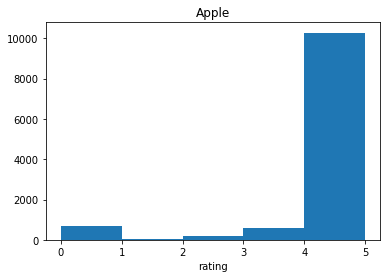

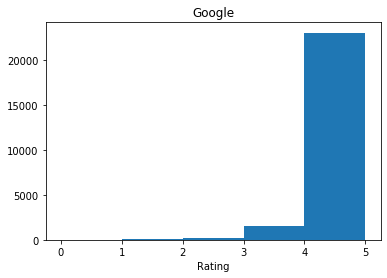

In [23]:
def freqs(data, boundaries):
    '''
    extracts the numbers of elements of data within the intervals
    (-infty, boundaries[0]), [boundaries[0], boundaries[1]), 
    [boundaries[1], boundaries[2]), ..., [boundaries[-1], infty),
    
    data: list of integers or floats
    boundaries: ordered ist of integers or floats
    '''
    Nb = len(boundaries)
    res = [0 for i in range(Nb+1)]
    for value in data: 
        for i in range(Nb):
            if boundaries[i] > value:
                res[i] += 1
                break
            if value >= boundaries[-1]:
                res[-1] += 1
    return res

vals_ratings = [x + 0.5 for x in range(5)]
boundaries_rating = [x + 0.5 for x in vals_ratings[:-1]]
freqs_rating_Apple = freqs(rating_vs_count_Apple[1], boundaries_rating)
freqs_rating_Google = freqs(rating_vs_count_Google[1], boundaries_rating)

plt.bar(vals_ratings, freqs_rating_Apple, width = 1)
plt.xlabel('rating')
plt.title('Apple')
plt.show()

plt.bar(vals_ratings, freqs_rating_Google, width = 1)
plt.xlabel('Rating')
plt.title('Google')
plt.show()

For the rating count in the Apple dataset, we take values with equally-spaces logarithm. The function `histo` defined below plots an histogram from a list of interval boundaries and a list of frequencies. The labels on the x axis are expressed with 2 significant digits.

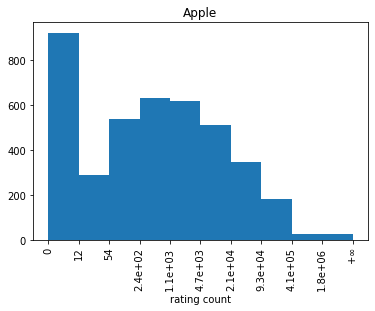

In [24]:
from numpy import exp, log

def histo(list_x, list_y, xmin = r'$-\infty$', xmax = r'$+\infty$'):
    Nx = len(list_x)+1
    xlabels = [xmin] + ['%.2g' % valx for valx in list_x] + [xmax]
    xticks = [x - 0.5 for x in range(Nx)]+[Nx-0.5]
    plt.bar(range(Nx), list_y, width = 1)
    plt.xticks(xticks, xlabels, rotation='vertical')

list_count_Apple = [exp(log(3.*10**6)*(i+1)/10) for i in range(10)]
boundaries_count_Apple = [0.5*(list_count_Apple[i] + list_count_Apple[i+1]) for i in range(len(list_count_Apple)-1)]
freqs_count_Apple = freqs(rating_vs_count_Apple[0], boundaries_count_Apple)

histo(boundaries_count_Apple, freqs_count_Apple, xmin = '0')
plt.xlabel('rating count')
plt.title('Apple')
plt.show()

In the Google dataset, only a few different values for the number of installs are given. We thus use them for the bar plot. We will need to order them. To this end, we define the function `order_xy` which takes two non-empty lists of real numbers, `x` and `y`, and returns two lists: `x_ordered`, the ordered version of `x`, and `y_ordered`, btained from `y` by applying the same transformation.

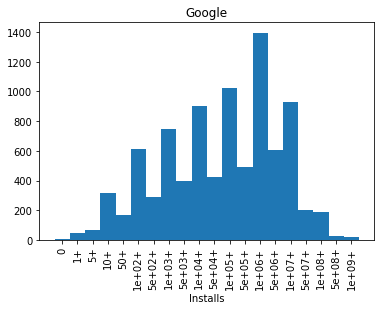

In [25]:
def order_xy(x,y):
    '''
    returns two lists: x_, the ordered list containing the same elements as x 
    with same multiplicity, and y_, obtained from y by applying the same 
    permutations as for changing x to x_
    
    x: list of elements on which an order is defined
    y: list with the same length as x
    '''
    x_ordered = [x[0]]
    y_ordered = [y[0]]
    for i in range(1,len(x)):
        el_x = x[i]
        el_y = y[i]
        if el_x >= x_ordered[-1]:
            x_ordered.append(el_x)
            y_ordered.append(el_y)
        else: 
            for j in range(len(x_ordered)):
                if x_ordered[j] >= el_x:
                    x_ordered.insert(j, el_x)
                    y_ordered.insert(j, el_y)
                    break
    return x_ordered, y_ordered

dict_installs_Google = {}
for row in data_Google_rel[1:]:
    N_installs = row[-2].replace(',','').replace('+','')
    if N_installs in dict_installs_Google:
        dict_installs_Google[N_installs] += 1
    else:
        dict_installs_Google[N_installs] = 1
list_N_installs_Google = [int(key) for key in dict_installs_Google]
list_N_Installs_count_Google = [dict_installs_Google[key] for key in dict_installs_Google]

list_N_installs_Google, list_N_Installs_count_Google = order_xy(list_N_installs_Google, list_N_Installs_count_Google)

xlabels = ['0'] + list(map(lambda valx: '%.2g+' % valx, list_N_installs_Google[1:]))
plt.bar(range(len(list_N_installs_Google)), list_N_Installs_count_Google, width = 1)
plt.xticks(range(len(list_N_installs_Google)), xlabels, rotation='vertical')
plt.xlabel('Installs')
plt.title('Google')
plt.show()

We notice that, over most of the range, the values between two powers of 10 have a smaller frequency than those corresponding to a power of 10. This is not surprising, as there is a factor 5 with the prevous power of 10 but only 2 with the next one. This behaviour thus seems to be an artefact from the way te data is presented. To get a more transparent graph, let us delete these intermediate values.

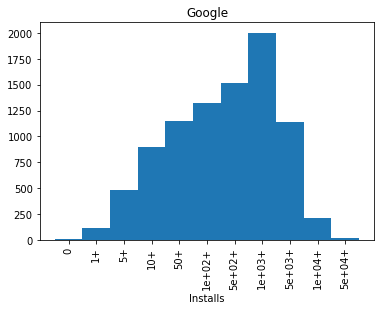

In [26]:
list_N_installs_Google_no_inter = [list_N_installs_Google[0]] + list_N_installs_Google[1::2]
list_N_Installs_count_Google_no_inter = [list_N_Installs_count_Google[0]]
i = 1
while 2*i < len(list_N_installs_Google):
    list_N_Installs_count_Google_no_inter.append(list_N_Installs_count_Google[2*i-1] + list_N_Installs_count_Google[2*i])
    i = i+1
list_N_Installs_count_Google_no_inter.append(list_N_Installs_count_Google[-1])

xlabels = ['0'] + list(map(lambda valx: '%.2g+' % valx, list_N_installs_Google[1:]))
plt.bar(range(len(list_N_installs_Google_no_inter)), list_N_Installs_count_Google_no_inter, width = 1)
plt.xticks(range(len(list_N_installs_Google_no_inter)), xlabels, rotation='vertical')
plt.xlabel('Installs')
plt.title('Google')
plt.show()

### Relation between the average rating and number of ratings / installs

In the following, it will be useful to know if there is some relation between our two target variables for each dataset. To this end, let us plot the averaged user rating of each app as a function of the number of ratings for the Apple dataset and Installs for the Google one. We first define the function `plot_dots` to generate the plots. We then define the function `extract_cols_float` which takes a dataset with header and a list of indices and returns two lists containing the numreical values associated with the corresponding columns, then use it to produce the two plots.

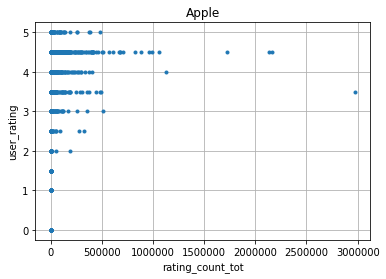

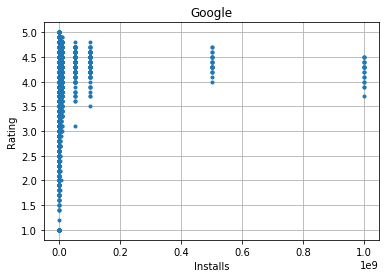

In [27]:
def plot_dots(x, y, xlabel='$x$', ylabel='$y$', title=None):
    plt.plot(x, y, r'.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()

plot_dots(rating_vs_count_Apple[0], rating_vs_count_Apple[1], data_Apple_rel[0][-2], data_Apple_rel[0][-1], 'Apple')
plt.show()

plot_dots(rating_vs_count_Google[0], rating_vs_count_Google[1], data_Google_rel[0][-2], data_Google_rel[0][-1], 'Google')
plt.show()

There seems to be no clear link between the number of ratings / installs and the average rating. most-rated/installed applications have an everage rating between 3.5 and 4.5 while the less popular ones have more variability. But this may well be a consequence of the fact that there are more of the latter. To confirm this, let us plot the average rating for differnet intervals of rating numbers / installs. This is most easily done for the Google dataset: 

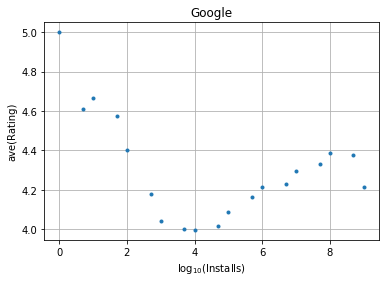

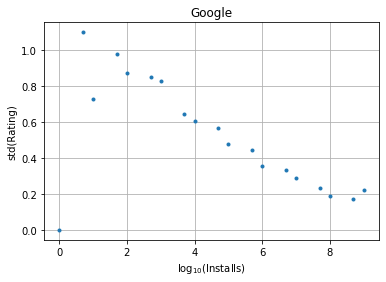

In [28]:
def insert_ord(x, l): 
    '''
    inserts x into the ordered list l
    
    l: list of elements on which an order is defined
    x: same type as the elements of l
    '''
    for i in range(len(l)):
        if l[i] >= x:
            l.insert(i, x)
            return None
    l.append(x)

list_count_Google = []
list_ave_rating_Google = []
for i in range(len(rating_vs_count_Google[0])):
    count = int(rating_vs_count_Google[0][i])
    ave_rating = rating_vs_count_Google[1][i]
    if count in list_count_Google: 
        list_ave_rating_Google[list_count_Google.index(count)].append(ave_rating)
    else: 
        insert_ord(count, list_count_Google)
        list_ave_rating_Google.insert(list_count_Google.index(count), [ave_rating])
list_ave_ave_rating_Google = [sum(l)/len(l) for l in list_ave_rating_Google]
list_std_ave_rating_Google = [sqrt(sum(map(lambda x: x*x,l))/len(l) - (sum(l)/len(l))**2) for l in list_ave_rating_Google]
plot_dots(list(map(lambda x: log(x)/log(10),list_count_Google)), list_ave_ave_rating_Google, '$\\log_{10}(\\mathrm{'+data_Google_rel[0][-2]+'})$','ave('+data_Google_rel[0][-1]+')', 'Google')
plt.show()
plot_dots(list(map(lambda x: log(x)/log(10),list_count_Google)), list_std_ave_rating_Google, '$\\log_{10}(\\mathrm{'+data_Google_rel[0][-2]+'})$','std('+data_Google_rel[0][-1]+')', 'Google')
plt.show()

There is no clear link between the number of installs and averaged rating. Applicatiosn downloaded less than 100 times seem to have a slightly higher average rating than the other, but the difference is broadly within one standard deviation. We do see, however, that the standard deviation of ratings decreases with the number of installs. 

Let us see if similar features are seen for the Apple dataset. To this end, we first need to separate the numbers of ratings into intervals. We propose to use 10 intervals, with boundaries following a geometric series from $1$ to $3 \times 10^6$.

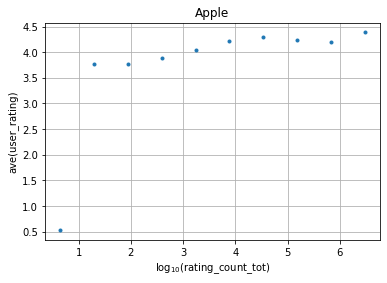

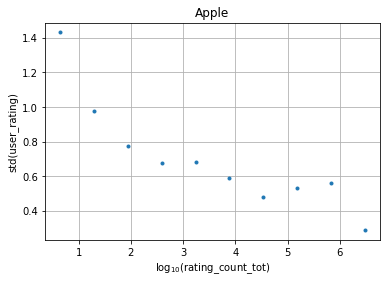

In [29]:
list_count_Apple = [exp(log(3.*10**6)*(i+1)/10) for i in range(10)]

list_ave_rating_Apple = [[] for i in range(10)]
for i in range(len(rating_vs_count_Apple[0])):
    for j in range(len(list_count_Apple)): 
        if rating_vs_count_Apple[0][i] <= list_count_Apple[j]:
            list_ave_rating_Apple[j].append(rating_vs_count_Apple[1][i])
            break
list_ave_ave_rating_Apple = [sum(l)/len(l) for l in list_ave_rating_Apple]
list_std_ave_rating_Apple = [sqrt(sum(map(lambda x: x*x,l))/len(l) - (sum(l)/len(l))**2) for l in list_ave_rating_Apple]
plot_dots(list(map(lambda x: log(x)/log(10),list_count_Apple)), list_ave_ave_rating_Apple, '$\\log_{10}(\\mathrm{'+data_Apple_rel[0][-2].replace('_','\\_')+'})$','ave('+data_Apple_rel[0][-1]+')', 'Apple')
plt.show()
plot_dots(list(map(lambda x: log(x)/log(10),list_count_Apple)), list_std_ave_rating_Apple, '$\\log_{10}(\\mathrm{'+data_Apple_rel[0][-2].replace('_','\\_')+'})$','std('+data_Apple_rel[0][-1]+')', 'Apple')
plt.show()

The average rating still seems essentially independent of the number of ratings (except for the first interval, where the average rating is very low). We also observe that the standard deviation decreases as the number of ratings increases. 

The main conclusion from these last four plots is that **no clear link emerges between our two target variables**.

## Data analysis 

Let us now start to do some proper data analysis. We would like to determine which kinds of apps are popular on both the Apple App Store and Google Play. We thus focus on features common to the two datasets: 
* the genre (columns `prime_genre` in the Apple dataset and `Category` and `Genres` in te Google one),
* the size (`size_bytes` in the Apple dataset and `Size` in the Google one),
* the content rating (`cont_rating` in the Apple dataset and `Content Rating` in the Google one).

### Genre

Let us first explore the app genres. The first thing we want to do is to build an ordered frequancy table for each of the corresponding columns. The function `ord_freq_table` defined below takes as argument a list of lists `dset` without header and an integer `ind`. It returns a frequency table for the elements with index `ind`, with frequencies expressed in percentages, ordered from highest to loowest frequency. The function `print_ord_freq_table` prints the result usig `pandas`.

In [75]:
def ord_freq_table(dset, ind):
    '''
    Returns an ordered frequency table (in percentages) of the column ind in dset
    
    return type: list of doublets
    dset: list of lists
    ind: integer
    '''
    
    Ncols = len(dset)
    dic_freq = {}
    for row in dset:
        key = row[ind].lower() # to avoid treating names with different cases as different names
        if key in dic_freq:
            dic_freq[key] += 1
        else:
            dic_freq[key] = 1
    table_reversed = sorted([(dic_freq[key]*100/Ncols, key) for key in dic_freq], reverse=True)
    return [(el[1], el[0]) for el in table_reversed]

def print_ord_freq_table(dset, ind):
    oftable = ord_freq_table(dset, ind)
    return pd.DataFrame(oftable, columns=['value', 'frequency (%)'], index=None).style.hide_index()

Let us test this function on a bogus data set:

In [76]:
bogus_dset = [[0,'a'], [1,'a'], [2,'a'], [3,'b'], [4,'b'], [5,'c']]
print_ord_freq_table(bogus_dset, 1)

value,frequency (%)
a,50
b,33.3333
c,16.6667


Let us apply this to the `prime_genre` column in the Apple dataset: 

In [77]:
print('Frequency table: Apple, column \'prime_genre\':')
print_ord_freq_table(data_Apple_rel[1:], 2) # exclude the header

Frequency table: Apple, column 'prime_genre':


value,frequency (%)
games,55.646
entertainment,8.23471
photo & video,4.11736
social networking,3.52564
education,3.25444
shopping,2.98323
utilities,2.68738
lifestyle,2.31755
finance,2.07101
sports,1.94773


The most common genre is by far “games”, including more than 55% of all apps. The distant second is “entertainment”, including a bit more than 8% of all apps. “Medical” is the least common genre, with less than 0.2%. Most of the apps are designed for entertainment rather than practical purposes. This seems to single out games as geerically popular apps, although a more careful analysis is needed before reaching any conclusion: so far we have only shown than they are the most represented genre, not that individual games are generally popular.

Let us do the same for the `Category` and `Genres` columns in the Google dataset:

In [78]:
print('Frequency table: Google, column \'Category\':')
print_ord_freq_table(data_Google_rel[1:], 0)

Frequency table: Google, column 'Category':


value,frequency (%)
family,18.9326
game,9.69198
tools,8.45086
business,4.59212
lifestyle,3.91515
productivity,3.89259
finance,3.70078
medical,3.52025
sports,3.39614
personalization,3.31716


The most common category is “family” (nearly 19%), followed by “games” (nearly 10%) and “Tools” (more than 8%). These apps seem more heavenly balanced between entertainment and practical purposes, but the later seems to have an edge.

In [79]:
print('Frequency table: Google, column \'Genres\':')
print_ord_freq_table(data_Google_rel[1:], 3)

Frequency table: Google, column 'Genres':


value,frequency (%)
tools,8.43958
entertainment,6.07018
education,5.34808
business,4.59212
productivity,3.89259
lifestyle,3.89259
finance,3.70078
medical,3.52025
sports,3.46384
personalization,3.31716


The most common genre is “Tools” (more than 8%), followed by “Entertainment” (more than 6%) and “Education” (more than 5%). Again, applications designed for practical purposes seem to be more numerous than those designed for entertainment.

We thus notice an important difference between the two datasets: while the Apple one is dominated by games and, the Google one has more apps designed for practical purposes, and with a more diverse array of ranges.

As another criterion to estimate the popularity of each app genre, let us compute the average number of ratings or installs for each primary genre (Apple dataset) or genre (Google dataset). The function `average_by_genre` below takes as arguments a list of lists representing a dataseet without header and two indices. The first index is that of the column giving the genre and the second index is that of the quantity to average. It returns a list of triplets of the form `(genre, frequency (%), average)`. the function `plot_average_by_genre` uses the `matplotlib` module to plot the result.

In [86]:
from numpy import isnan
def average_by_genre(dset, ind1, ind2):
    '''
    Returns a list of triplets of the form (genre, frequency, average), where 
    'genre' takes the values of index ind1 in each row, 'frequency' is its 
    frequency in %, and 'average' the average of the value with index ind1 for 
    this genre. the list is ordered by frequency.
    
    return type: list of triplets
    dset: list of lists
    ind1: integer
    ind2: integer
    '''
    
    Ncols = len(dset)
    dic_freq = {}
    for row in dset:
        key = row[ind1].lower() # to avoid treating names with different cases as different names
        val = float(row[ind2].replace('+','').replace(',','')) # delete the '+' and ',' characters if present
        if not isnan(val):
            if key in dic_freq:
                dic_freq[key][0] += 1
                dic_freq[key][1] += val
            else:
                dic_freq[key] = [1, val]
    table_reversed = sorted([(dic_freq[key][0]*100/Ncols, dic_freq[key][1]/dic_freq[key][0], key) for key in dic_freq], reverse=True)
    return [(el[2], el[0], el[1]) for el in table_reversed]

def plot_average_by_genre(dset, ind1, ind2):
    oftable = average_by_genre(dset, ind1, ind2)
    plt.bar(range(len(oftable)), [triplet[2] for triplet in oftable])
    plt.xticks(range(len(oftable)), [triplet[0] for triplet in oftable], rotation='vertical')
    plt.ylabel('average')
    plt.show()

Apple dataset: average of the number of ratings


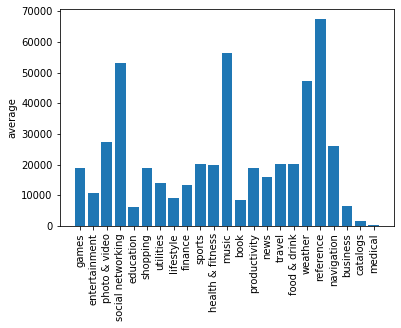

In [87]:
print('Apple dataset: average of the number of ratings')
plot_average_by_genre(data_Apple_rel[1:], 2, 5)

Games have, on average, a bit less than 20000 ratings. This is much less than  Reference apps, which have more than 67000 ratings on average, as well as Social Networking and Weather, which both have wlose to or more than 50000 ratings on average. Excluding Reference apps, which have  afrequency of less than 1%, Social Networking now seems the most promising genre for designing a popular app.

Let us do the same for the Google dataset. One difficulty is that the given number of installs is not very precise. However, since there seems to be more apps with a small number of installs, and since we do not need precise results, it seems sensible to assume that all apps with a number of downloads noted as `N+` for some integer N have been installed exactly N times. For the genre, we will use the column `Category`, which has less different values than `Genres`.

Google dataset: average of the number of instals


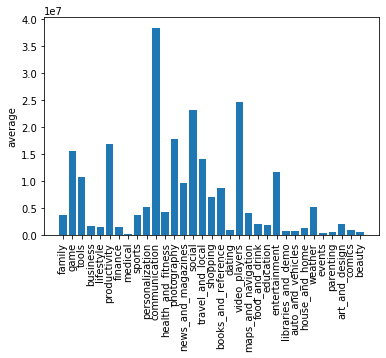

In [88]:
print('Google dataset: average of the number of instals')
plot_average_by_genre(data_Google_rel[1:], 0, 5)

The apps with highest average numbers of installs seem to be those in the `COMMUNICATION` and `social` categories (which, I assume, include social networking apps). From this, and the previous result, it seems that **a social networking app has the potential to be popular on both app stores**. Let us now see if the average rating supports this conclusion.

Apple dataset: average rating


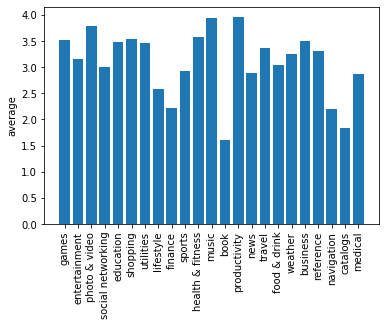

In [89]:
print('Apple dataset: average rating')
plot_average_by_genre(data_Apple_rel[1:], 2, 6)

Google dataset: average rating


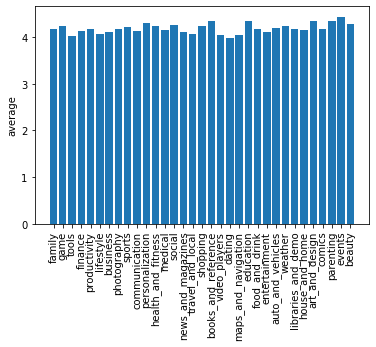

In [90]:
print('Google dataset: average rating')
plot_average_by_genre(data_Google_rel[1:], 0, 6)

There is little variation of the rating with category in the Google dataset. However, social networking apps have an average rating just under 3 in the Apple dataset, which is a bit lower than the average over all apps. This is probably not enough to question the above conslusion as there is (as far as I can see) no clear link between the average rating of a genre and how its popularity will evolve in the future. A more complete analysis would be required to estimate how this relatively weak rating average may impact the profitability of a social networking app. It may be particularly relevent if in-app purchases or subscriptions are included, as users may be more willing to pay for an app they like. 

One possibility to mitigate this weakness is to focus the app on photo and video sharing, *e.g.* by adding basic photo editing features (filters, resizing, operations on colors) and allowing users to exchange them effortlessly. Photo and video apps are quite well-rated on the Apple store, and photo apps are relatively popular on both stores. To make this idea more precise, one could imagine something half-way between Facebook and Instagram, focused on the exchange of photos, the buildng of private, semi-private, and public photo albums, and discussions on subjects related to or triggered by photography.